# zipcode_dummies+price_transformation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [3]:
data=pd.read_csv(r"C:\Users\Akshaya\Desktop\python-great lakes\CAPSTONE\jupyter files\final_data_used.csv")

In [4]:
data.head()

,Unnamed: 0,host_id,host_is_superhost,host_identity_verified,zipcode,latitude,longitude,property_type,room_type,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,No_of_amenities
0,0,2164,0,1,13355,52.54425,13.39749,Apartment,Private room,1,...,82.0,9.0,8.0,9.0,9.0,9.0,8.0,0,moderate,13
1,1,3718,0,1,10405,52.53500,13.41758,Apartment,Entire home/apt,4,...,93.0,9.0,9.0,9.0,9.0,10.0,9.0,0,strict_14_with_grace_period,19
2,2,4108,0,0,10777,52.49885,13.34906,Apartment,Private room,1,...,89.0,9.0,9.0,9.0,10.0,9.0,9.0,0,strict_14_with_grace_period,24
3,3,16149,0,1,10243,52.51171,13.45477,Loft,Entire home/apt,2,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,26
4,4,17391,1,1,10437,52.54316,13.41509,Apartment,Private room,2,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,15


In [5]:
data.columns

Index(['Unnamed: 0', 'host_id', 'host_is_superhost', 'host_identity_verified',
       'zipcode', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'No_of_amenities'],
      dtype='object')

In [6]:
data.drop(['Unnamed: 0', 'host_id', 'latitude', 'longitude', 'property_type','accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities','review_scores_rating', 'review_scores_accuracy','review_scores_checkin',
       'review_scores_communication', 'review_scores_location','instant_bookable', 'cancellation_policy'],axis=1,inplace=True)

In [7]:
data=data[data['zipcode'].notna()]

In [8]:
data1=pd.get_dummies(data,columns=['zipcode', 'room_type'],drop_first=True)

In [9]:
y=data1['price']
X=data1.drop('price',axis=1)

In [10]:
import statsmodels.api as sm
xc=sm.add_constant(X)
lin_reg=sm.OLS(y,xc)
result=lin_reg.fit()
print(result.summary())

C:\Users\Akshaya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     30.84
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:55:18   Log-Likelihood:            -1.6014e+05
No. Observations:               24020   AIC:                         3.207e+05
Df Residuals:                   23799   BIC:                         3.225e+05
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

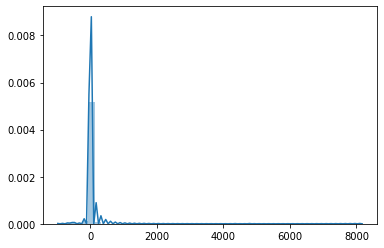

In [11]:
residuals=result.resid
sns.distplot(residuals)
plt.show()

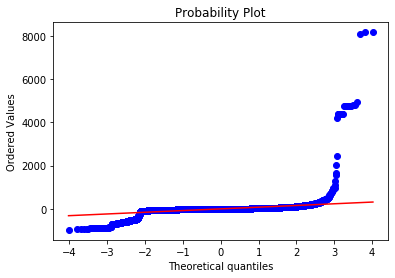

In [12]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
host_is_superhost,1.431648
host_identity_verified,1.597283
cleaning_fee,3.090711
guests_included,4.299132
extra_people,1.801349
review_scores_cleanliness,113.085192
review_scores_value,163.552915
No_of_amenities,5.699169
zipcode_10115,5.663841
zipcode_10115\n10115,1.007417


In [ ]:
residuals=result.resid
y_pred=result.predict(xc)
sns.regplot(x=y_pred,y=residuals,line_kws={'color':'r'},lowess=True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Ridge

In [14]:
n_alphas=1000
alphas=np.logspace(-12,12)
ridge_cv=RidgeCV(alphas=alphas,store_cv_values=True)
ridge_cv.fit(X,y)

ridge_cv.alpha_

5.428675439323859

In [ ]:
ridge=Ridge(alpha=5.428675439323859)
ridge.fit(X,y)
ridge.coef_
pd.DataFrame(ridge.coef_,X.columns,columns=['coefs'])

## Lasso

In [19]:
n_alphas=1000
alphas=np.linspace(0.1,10,n_alphas)
lasso_cv=LassoCV(alphas=alphas,cv=3, random_state=22)
lasso_cv.fit(X,y)

LassoCV(alphas=array([ 0.1       ,  0.10990991,  0.11981982,  0.12972973,  0.13963964,
        0.14954955,  0.15945946,  0.16936937,  0.17927928,  0.18918919,
        0.1990991 ,  0.20900901,  0.21891892,  0.22882883,  0.23873874,
        0.24864865,  0.25855856,  0.26846847,  0.27837838,  0.28828829,
        0.2981982 ,  0.30810811,  0.31801802,  0.32792793,  0.33783784,
        0.34774775,  0.35765766,  0.36756757,  0.37747748,  0.38738739,
        0.39729...
        9.86126126,  9.87117117,  9.88108108,  9.89099099,  9.9009009 ,
        9.91081081,  9.92072072,  9.93063063,  9.94054054,  9.95045045,
        9.96036036,  9.97027027,  9.98018018,  9.99009009, 10.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=22, selection='cyclic', tol=0.0001,
        verbose=False)

In [20]:
lasso_cv.alpha_

6.333333333333334

In [ ]:
lasso=Lasso(alpha=6.33)
lasso.fit(X,y)
lasso.coef_
pd.DataFrame(lasso.coef_,X.columns,columns=['coefs'])

## ElasticNet

In [22]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
n_alphas=1500
alphas=np.logspace(-10,10,n_alphas)
elastic_cv=ElasticNetCV(alphas=alphas,cv=3)
elastic_cv.fit(X,y)
elastic_cv.alpha_

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135306.3002935648, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178838.78048479557, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234818.38255500793, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge.

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40666790.2999351, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50825256.03767133, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57468500.82635552, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Yo

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259184531.81249255, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265656447.191079, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269167319.4549897, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Y

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348764506.89791405, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349892281.94121087, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351131190.26912874, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369024270.16273344, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369343232.7156955, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369648472.0112416, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. 

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374880067.0436112, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374973289.9985183, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375063302.2182571, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Y

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376830337.4718029, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376859880.586067, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376888514.4449676, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Yo

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377462466.1419574, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377472904.69120306, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377483032.4567434, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. 

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377679553.82991743, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377683612.61540145, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377687544.46050906, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377762982.7029022, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377764488.43439686, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377765948.7106687, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. 

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377792370.7622414, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377792990.48361015, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377793591.55617946, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge.

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377805437.5017528, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377805663.0563222, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377805881.5773536, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Y

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377810269.07797855, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377810348.4952964, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377810425.2062959, tolerance: 104105.73882176985
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. 

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3380678.9645634294, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3621993.4693621397, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5066047.645373106, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Yo

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88484356.032189, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91718238.66568096, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93724708.4746611, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You mig

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144628602.47381386, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145526034.2450606, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146344576.18689066, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Yo

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158766687.87779957, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158930475.4679977, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159086947.16171247, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Yo

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161641482.45938137, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161693243.56198445, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161743026.49436224, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Y

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162630176.02544743, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162648075.88686612, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162665414.33230332, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Y

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162976896.9807549, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162984201.5902172, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162991285.95651978, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163128639.21841177, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163131407.8874763, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163134094.14269805, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Yo

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163182907.5938945, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163184057.99204984, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163185173.9631363, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163205410.45276898, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163205886.05180508, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163206347.3520583, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Yo

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163214893.6373842, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163215083.6030769, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163215267.82167435, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163218677.67451552, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163218753.30324027, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163218826.68872452, tolerance: 37865.91152931993
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Y

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81329.60173040628, tolerance: 81291.18910711254
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81313.19545465708, tolerance: 81291.18910711254
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81299.16483217478, tolerance: 81291.18910711254
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You 

0.028772172038692492

In [ ]:
enet=ElasticNet(alpha=0.028)
enet.fit(X,y)
pd.DataFrame(enet.coef_,X.columns,columns=['coefs'])

In [23]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
enet=ElasticNet(alpha=0.028)
lasso=Lasso(alpha=6.33)
ridge=Ridge(alpha=5.428675439323859)
models=[]

In [24]:
models.append(('Linear',LR))
models.append(('Ridge',ridge))
models.append(('Lasso',lasso))
models.append(('ElasticNet',enet))

In [25]:
from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Linear: -5981932435289824.000000 (283872332985620332792453791744000.000000))
Ridge: 0.197069 (0.007360))
Lasso: 0.074366 (0.000150))
ElasticNet: 0.136574 (0.000589))


In [26]:
from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Linear: -206894546768935157760.000000 (350989219363492915269726723208915474972672.000000))
Ridge: -36780.003116 (136432616.871350))
Lasso: -43154.482622 (235806828.667719))
ElasticNet: -40137.655650 (196227422.415961))


In [ ]:
from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

### REgressors

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort=False

In [28]:
from sklearn.model_selection import GridSearchCV


dt=DecisionTreeRegressor(random_state=0)
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(dt,param,cv=3,scoring='r2')
GS.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         '

In [29]:
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

0.017936672311800798
{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
DecisionTreeRegressor(criterion='mse', max_depth=7, max_features='sqrt',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [ ]:
dt=DecisionTreeRegressor(random_state=0)
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(dt,param,cv=3,scoring='neg_mean_absolute_error')
GS.fit(X,y)

print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

## KNN

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn,param,cv=3,scoring='r2')
GS.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [31]:
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

-0.10332276585257809
{'n_neighbors': 49, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                    weights='distance')


## RF

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(rf,param,cv=3,scoring='r2')
GS.fit(X,y)
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

0.07601498801128224
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Bagging- r2

In [33]:
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings("ignore")


alg=['DT','KNN','LR']
for i in alg:
    if i=='DT':
        results=[]
        cart = DecisionTreeRegressor(random_state=0,max_depth= 8, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 10)
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    elif i=='KNN':
        results=[]
        cart =KNeighborsRegressor(n_neighbors= 19, weights= 'distance')
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    else:
        results=[]
        cart =LinearRegression()
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()

DT: 0.749367 (0.063439))

KNN: 0.595585 (0.043035))

LR: -567915912325215.125000 (1024882053339186362606191378432.000000))



## Adaboost

In [36]:
from sklearn.ensemble import AdaBoostRegressor
alg=['RF','DT','KNN','LR']
for i in alg:
    if i=='DT':
        results=[]
        cart = DecisionTreeRegressor(random_state=0,max_depth= 8, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 10)
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    elif i =='RF':
        results=[]
        cart = RandomForestRegressor(max_depth= 9, max_features= 'auto', min_samples_leaf= 2,min_samples_split= 10)
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    elif i=='KNN':
        results=[]
        cart =KNeighborsRegressor(n_neighbors= 19, weights= 'distance')
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    else:
        results=[]
        cart =LinearRegression()
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()

RF: -0.522903 (0.343689))

DT: -0.539519 (0.453668))



KeyboardInterrupt: 

# Significant variables only

In [ ]:
data2=data.copy()

In [ ]:
data2.columns

In [ ]:
data2.drop(['Unnamed: 0', 'host_id', 'latitude', 'longitude', 'property_type','accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities','review_scores_rating', 'review_scores_accuracy','review_scores_checkin',
       'review_scores_communication', 'review_scores_location','instant_bookable', 'cancellation_policy'],axis=1,inplace=True)

In [ ]:
data2=data2[data2['zipcode'].notna()]

In [ ]:
data2=pd.get_dummies(data2,columns=['zipcode','room_type'])

In [ ]:
y=data2['price']
X=data2.drop('price',axis=1)

In [ ]:
import statsmodels.api as sm
xc=sm.add_constant(X)
lin_reg=sm.OLS(y,xc)
result=lin_reg.fit()
print(result.summary())